## IMDb映画レビューの分類

In [ ]:
from keras.datasets import imdb
# num_wordsは出現頻度が高い10,000個の単語だけを残しておき、出現頻度が低い単語は捨てる。
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [56]:
len(train_data[0])

218

In [57]:
train_labels[0]

1

### <font color='blue'>データの準備</font>

In [58]:
import numpy as np

# one-hotベクトルに変換
def vectorize_sequences(sequences, dimension=10000):
    
    print(len(sequences))
    # 形状が(len(sequences), dimension)の行列を作成し、0で埋める。
    results = np.zeros((len(sequences), dimension))
    # print(results)
    print(results.shape)
    
    # iの場所を1.で埋める
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        
    return results

In [59]:
x_train = vectorize_sequences(train_data)

25000
(25000, 10000)


In [60]:
x_train.shape

(25000, 10000)

In [61]:
x_test = vectorize_sequences(test_data)

25000
(25000, 10000)


In [62]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### <font color='blue'>ニューラルネットワークの構築</font>

In [63]:
# モデルの定義
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [64]:
# モデルのコンパイル
model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
              metrics = ['accuracy']
             )

In [65]:
# オプティマイザの設定
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = 'binary_crossentropy',
              metrics = ['accuracy']
             )

In [66]:
# カスタム損失関数とカスタム指標の使用
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy]
             )

### <font color='blue'>アプローチの検証</font>

In [67]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [68]:
model.compile(
    optimizer='rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size = 512,
    validation_data = (x_val, y_val) 
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 304us/step - loss: 0.5086 - acc: 0.7815 - val_loss: 0.3794 - val_acc: 0.8696
Epoch 2/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.3005 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8898
Epoch 3/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.2180 - acc: 0.9281 - val_loss: 0.3088 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1750 - acc: 0.9436 - val_loss: 0.2840 - val_acc: 0.8836
Epoch 5/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.1427 - acc: 0.9544 - val_loss: 0.2849 - val_acc: 0.8867
Epoch 6/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3164 - val_acc: 0.8771
Epoch 7/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.0979 - acc: 0.9705 - val_loss: 0.3126 - 

In [69]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

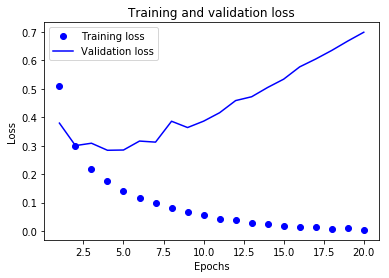

In [70]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [71]:
# 図を消す
plt.clf()

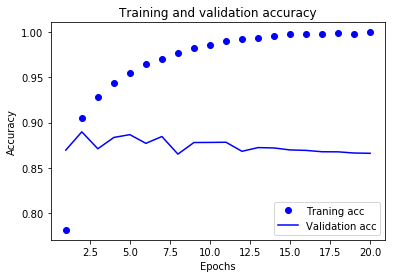

In [72]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Traning acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

上記の図から4epoch目くらいで過学習していることが分かる。<br>

### <font color='blue'>モデルの訓練をやり直す</font>

In [74]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs = 4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.4746 - acc: 0.8212
Epoch 2/4
25000/25000 [==============================] - 2s 84us/step - loss: 0.2646 - acc: 0.9100
Epoch 3/4
25000/25000 [==============================] - 2s 85us/step - loss: 0.1982 - acc: 0.9304
Epoch 4/4
25000/25000 [==============================] - 4s 168us/step


In [75]:
results

[0.3234974066352844, 0.87292]

In [76]:
result = model.predict(x_test)

レビューが肯定的と判断された尤度を表示

In [77]:
result

array([[0.1391308 ],
       [0.99969196],
       [0.2973761 ],
       ...,
       [0.07253239],
       [0.04450933],
       [0.46486577]], dtype=float32)

確実に分類できるサンプル(0.99以上か0.01以下)もあれば、確実に分類できないサンプル(0.6, 0.4)も存在する。